#  K Nearest Neighbours (KNN) Classification Solution


![alt text](data/titanic.png "Title")


https://www.kaggle.com/c/titanic

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

* Can you predict if a person  of age 35 and fare 450 would have survived?

* part of the cells are already completed for you , roughly in the middle there is a "YOUR TURN" .. where you will have to insert your code

## 1. Analyse your Data

##### <font color='red'>Python:</font>

* to get access to the functionality of a library we always need to tell the program to import that library. We use import and the name of the library. Since we will have to type the name of the library everytime we want to access its methods we use the keyword 'as' to make the name shorter. 

In [44]:
import numpy as np 
import pandas as pd 

##### <font color='red'>Python:</font>

* to load a dataset we use the command pd.read_csv and we pass the path to the csv file .
* the data are stored in the data folder that you downloaded


In [45]:
# This is only the training set
data=pd.read_csv("data/titanic.csv")

##### <font color='red'>Python:</font>

* now all the data are stored in the object called data. 
* to get the idea of the data we can use:
    * .shape
    * .describe()
    * .info()
    

In [46]:
# data.shape  this is an attribute of the data
data.shape

(891, 12)

In [47]:
# data.describe() this is a method call -->  notice the difference between a method and an attribute 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# data.info() this is a method call
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### selecting only some columns for our model
the info method returned that there are some missing values in the dataset. For instance, there 891 entries but Age column has only 714 non-null value. This is a problem we need to fix. Also for the purpose of this exercise we will focus only on two features and one label:

    * Age --> FEATURE 
    * Fare  --> FEATURE
    * Survived --> TARGET

##### <font color='red'>Python:</font>

* to select only specific columns in a dataset we use indexing. Indexing is done by adding the square brackets and the name of the columns in double quotes as a list of names.
* We then assign the selection to the original data variable. So the object data is only made of 3 columns now
* data.hea() is a method that will show the first 5 rows of the data ( it makes the visualisation more compact)

In [49]:
data = data[["Survived","Age","Fare"]]
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


##### <font color='red'>Python:</font>

* the column Age had some missing value. This time we decide to fill the value with the mean of the column. This is a decision we make, alternatevely we could have dropped the rows with the missing values or find a more elegant way to fill the missing value. For instance we could calculate two means, one for women and one for men.

In [50]:
# we fill the null values with the mean of the column
data=data.fillna(data.mean())

##### <font color='red'>Python:</font>

* another library for plotting is called matplotlib
* here we plot a histogram of our target

In [51]:
import matplotlib.pyplot as plt

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

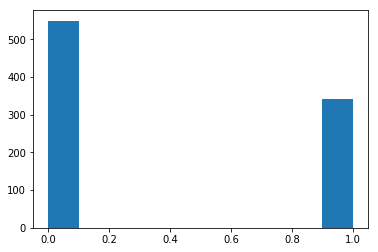

In [52]:
plt.hist(data["Survived"])

* 0 is not survived and 1 is survived

##### <font color='red'>Python:</font>

* the scatter plot is provided by the matplotlib library . it requires the x and y values and we can assign a color
* we assign a different color for each class (survived or not) 
* also we set the alpha color to 0.5 to have a better visualisation of the dots 

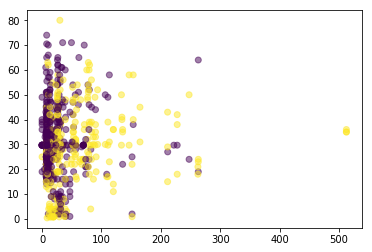

In [53]:
plt.scatter( x=data["Fare"],y=data["Age"], c=data["Survived"], alpha = 0.5)


Here Purple point implies that the person didn't survived 





# <font color='purple'>Your Turn:</font>

#### <font color='blue'>try to create a model using KNN classifier in order to make prediction with the titanic dataset</font>

your task are:

* import the train_test_split module from sklearn.model_selection
* understand which columns are your features and which are your labels
* split the data in train and test set 
* load the KNeighborsClassifier
* create the classifier with n_neighbors=20
* fit your data (features and labels) to the model 
* check the accuracy of the model with different n_neighbors
* deploy the model and make a prediction for a person of age 35 and fare 450


## 2. Define the features X and the target y

In [54]:
X = data[["Age","Fare"]]
X.shape

(891, 2)

In [55]:
y = data['Survived']
y.shape

(891,)

##### <font color='red'>Python:</font>

* in order to evaluate our model we need to split into train and test set
* we can use   train_test_split from sklearn.model_selection it also shuffles the data


## 3. Divide the data into 2 splits: training set and testing set

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) 

In [58]:
print (X_train.shape)
print (X_test.shape)

(668, 2)
(223, 2)


In [59]:
print (y_train.shape)
print (y_test.shape)

(668,)
(223,)


### 4. Create the model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=20)

### 5. Train the model

In [62]:
# fit the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

### 6. Evaluate the model

In [63]:
# training accuracy
knn.score(X_train,y_train)

0.6991017964071856

test accucary:
    to get the accuracy of the model we need to use the score method and pass our feature test and label test

In [64]:
# Test accuracy
knn.score(X_test,y_test)

0.7443946188340808

### 7. Tune the parameters of the model to increase the performance

In [65]:
####### try to change the k in the previous cells and run the entire code again


### 8. Make prediction

In [66]:
# we can use our test sample to make prediction
result = knn.predict(np.array([[35,450]]))
result

array([1], dtype=int64)

this person would survive